# Data Cleaning Challenge

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
% matplotlib inline



UsageError: Line magic function `%` not found.


In [2]:
data = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-data.csv')

In [12]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [14]:
def correct_names (df): 
    if df['class'] == "versicolor": 
        return "Iris-versicolor"
    elif df['class'] == 'Iris-setossa': 
        return "Iris-setosa"
    else: 
        return df['class']
    
data['class'] = data.apply(lambda row: correct_names(row), axis=1)

In [13]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.469734
sepal_width_cm,0.066091,1.000000,-0.419796,-0.348464
petal_length_cm,0.489083,-0.419796,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


In [15]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

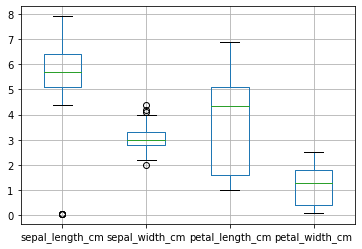

In [19]:
data.boxplot();

In [48]:
#Searching for some NaN values 
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [54]:
print(data[data['petal_width_cm'].isnull()])

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa  


In [63]:
setosa = data[(data['class'] == "Iris-setosa")]
versicolor = data[(data['class'] == "Iris-versicolor")]
virgin = data[(data['class'] == "Iris-virginica")]

In [66]:
def cal_mean (df): 
    if df['class'] == "Iris-setosa" and np.isnan(df['petal_width_cm']): 
        avg = np.mean(setosa['petal_width_cm'])
        return avg
    else: 
        return df['petal_width_cm']

data['petal_width_cm'] = data.apply(lambda row: cal_mean(row), axis=1)

In [57]:
data_outliners = data[(data['sepal_width_cm'] > 4) |
                      (data['sepal_length_cm'] < 1)|
                      (data['sepal_width_cm'] < 2.1 )]
data_outliners.head(13)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
15,5.700,4.4,1.5,0.4,Iris-setosa
32,5.200,4.1,1.5,0.1,Iris-setosa
33,5.500,4.2,1.4,0.2,Iris-setosa
60,5.000,2.0,3.5,1.0,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [62]:
# Here we make the values 100 times bigger. 
data.loc[(data.sepal_length_cm < 1), 'sepal_length_cm']=data.sepal_length_cm*100

In [44]:
versicolor.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.243639,0.292672,0.226652
sepal_width_cm,0.243639,1.000000,0.572397,0.673303
petal_length_cm,0.292672,0.572397,1.000000,0.786668
petal_width_cm,0.226652,0.673303,0.786668,1.000000


In [46]:
virgin.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.497992,0.730484,0.276364
sepal_width_cm,0.497992,1.000000,0.401045,0.490342
petal_length_cm,0.730484,0.401045,1.000000,0.290190
petal_width_cm,0.276364,0.490342,0.290190,1.000000


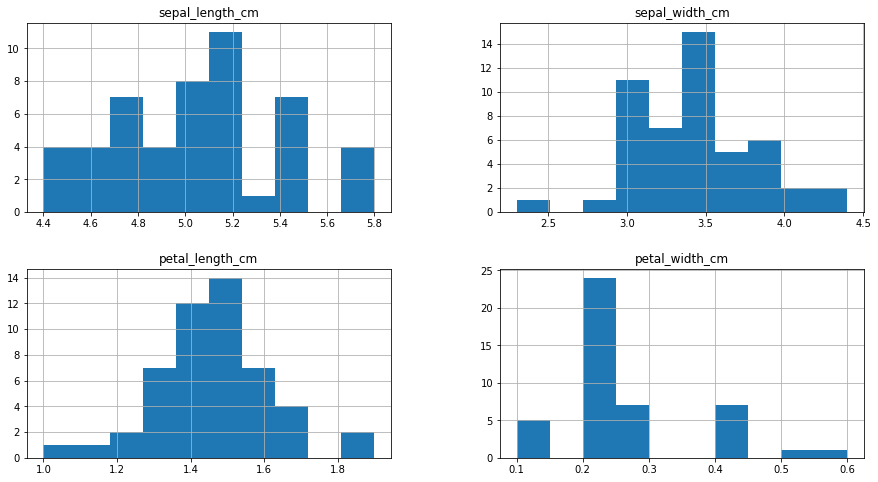

In [38]:
setosa.hist(figsize=(15,8)); 

In [68]:
data_clean = data.to_csv('/Users/bert/Desktop/dataV2-labs/module-3/Data-Cleaning-Challenge/clean_iris-data.csv', index=False)